# Tensor Flow Model Multi-Category Classification Exercises

Data Set

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

*Connect Colab to Kaggle*
- https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

### Import the necessary libraries

- Pandas, numpy, matplotlib, seaborn
- SKLearn - train_test_split, MinMaxScaler, confusion_matrix, classification_report
- TensorFlow - Sequential, Dense, EarlyStopping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler







### Create a dataframe from this dataset


In [2]:
df = pd.read_csv('bodyPerformance.csv')

In [3]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


### Data Exploration

Are there any missing values

Is there any correlation between the data

How does the gender relate to the class?


In [4]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
df.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


In [6]:
df['cat_class'] = pd.Categorical(df['class']).codes

In [7]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,cat_class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [8]:
df['cat_gender'] = pd.Categorical(df['gender']).codes

In [9]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,cat_class,cat_gender
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0


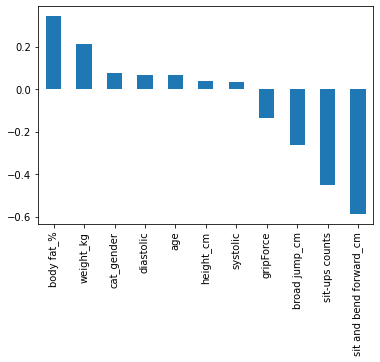

In [10]:
df.corr()['cat_class'].drop('cat_class').sort_values(ascending=False).plot(kind='bar')

### Data Cleanup

Split the gender column using oneHotEncoding (get_dummies with a drop_first=True) and drop the gender column

In [11]:
gen = pd.get_dummies(df['gender'], drop_first=True)

In [12]:
df = pd.concat([df, gen], axis=1)

In [13]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,cat_class,cat_gender,M
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1,1
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1,1
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1,1
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0,0


In [14]:
# Rearrange

df.columns.tolist()

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'class',
 'cat_class',
 'cat_gender',
 'M']

In [15]:
cols = ['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'M',
 'class',
 'cat_class',
 'cat_gender']

In [16]:
df[cols]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,M,class,cat_class,cat_gender
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1,C,2,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,A,0,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1,C,2,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,B,1,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1,C,2,1
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1,D,3,1
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,A,0,1
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,D,3,0


In [17]:
df = df.drop('gender', axis=1)

In [18]:
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,cat_class,cat_gender,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0,0


In [19]:
cols = ['age',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'M',
 'class',
 'cat_class',
 'cat_gender']

In [20]:
df = df[cols]

In [21]:
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,M,class,cat_class,cat_gender
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1,C,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1,C,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,B,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1,C,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1,D,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,A,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,D,3,0


### Train test split the data
For the y values, split the outcomes into columns of their own

Train test split the X and y values

Apply MinMaxScaler to the data

In [22]:
X = df[df.columns[:-3]].values

y = pd.get_dummies(df['class']).values

In [23]:
X

array([[ 27.  , 172.3 ,  75.24, ...,  60.  , 217.  ,   1.  ],
       [ 25.  , 165.  ,  55.8 , ...,  53.  , 229.  ,   1.  ],
       [ 31.  , 179.6 ,  78.  , ...,  49.  , 181.  ,   1.  ],
       ...,
       [ 39.  , 177.2 ,  80.5 , ...,  45.  , 229.  ,   1.  ],
       [ 64.  , 146.1 ,  57.7 , ...,   0.  ,  75.  ,   0.  ],
       [ 34.  , 164.  ,  66.1 , ...,  51.  , 180.  ,   1.  ]])

In [24]:
y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
# Scale

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Let's build out the model

Hidden Layers
- 3 Layers
- 12 units per layers
- relu activation

Output Layer
- 4 units
- `softmax` activation funtion

Compile
- optimizer: Adam
- loss: categorical_crossentropy
- metrics: accuracy

Callbacks
- EarlyStopping
- monitor: val_loss
- mode: min
- patience: 10

Fit the model with 1500 epochs


In [27]:
model_1 = Sequential()

model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(12, activation='relu'))

model_1.add(Dense(4, activation='softmax'))


model_1.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs=1500,
    callbacks=[es]
)

Epoch 1/1500
293/293 [==============================] - 2s 5ms/step - loss: 1.3563 - accuracy: 0.3297 - val_loss: 1.2914 - val_accuracy: 0.4082
Epoch 2/1500
293/293 [==============================] - 1s 4ms/step - loss: 1.1349 - accuracy: 0.4837 - val_loss: 1.0264 - val_accuracy: 0.5411
Epoch 3/1500
293/293 [==============================] - 1s 4ms/step - loss: 0.9938 - accuracy: 0.5523 - val_loss: 0.9803 - val_accuracy: 0.5565
Epoch 4/1500
293/293 [==============================] - 1s 5ms/step - loss: 0.9548 - accuracy: 0.5682 - val_loss: 0.9569 - val_accuracy: 0.5555
Epoch 5/1500
293/293 [==============================] - 1s 4ms/step - loss: 0.9378 - accuracy: 0.5705 - val_loss: 0.9399 - val_accuracy: 0.5749
Epoch 6/1500
293/293 [==============================] - 1s 5ms/step - loss: 0.9235 - accuracy: 0.5779 - val_loss: 0.9297 - val_accuracy: 0.5729
Epoch 7/1500
293/293 [==============================] - 1s 4ms/step - loss: 0.9156 - accuracy: 0.5801 - val_loss: 0.9196 - val_accuracy:

### Model Summary and Plots

Output the model summary

Plot the loss and accuracy curves


In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 4)                 52        
                                                                 
Total params: 508
Trainable params: 508
Non-trainable params: 0
_________________________________________________________________


In [33]:
def plot_losses(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.plot(loss, label='loss')
  plt.plot(val_loss, label='val_loss')
  plt.title('Losses')
  plt.legend()

  plt.figure()
  plt.plot(accuracy, label='accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.title('Accuracies')
  plt.legend()


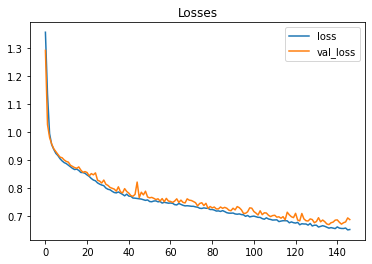

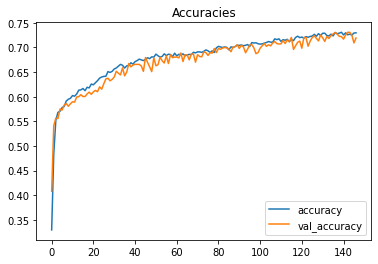

In [34]:
plot_losses(history_1)

### Predictions

- Evaluate the performance of the model against X_test and y_test

- Run predictions on the model using X_test

- Find the positions of the highest values in the prediction and y_test

- Run a confusion matrix and classification report


In [36]:
model_1.evaluate(X_test, y_test)

126/126 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7190


[0.6868637800216675, 0.7190144062042236]

In [37]:
prediction_1 = model_1.predict(X_test)

In [38]:
prediction_1

array([[1.1421602e-03, 7.1769530e-01, 2.7196196e-01, 9.2004966e-03],
       [7.9903454e-01, 1.7044201e-01, 2.9453330e-02, 1.0700694e-03],
       [2.7505683e-02, 7.3523557e-01, 2.1868622e-01, 1.8572468e-02],
       ...,
       [1.2177303e-27, 1.6295360e-10, 4.6469183e-03, 9.9535310e-01],
       [3.9881768e-16, 7.3481260e-06, 1.3282026e-01, 8.6717242e-01],
       [2.4868686e-01, 3.9741075e-01, 2.3567426e-01, 1.1822814e-01]],
      dtype=float32)

In [39]:
pred_1 = np.argmax(prediction_1, axis=1)

In [40]:
pred_1

array([1, 0, 1, ..., 3, 3, 1])

In [41]:
actual = np.argmax(y_test, axis=1)

In [42]:
actual

array([1, 1, 1, ..., 3, 3, 0])

In [43]:
confusion_matrix(actual, pred_1)

array([[760, 220,   5,   5],
       [193, 676, 134,  32],
       [ 61, 233, 604,  99],
       [ 16,  49,  82, 849]])

In [44]:
print(classification_report(actual, pred_1))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       990
           1       0.57      0.65      0.61      1035
           2       0.73      0.61      0.66       997
           3       0.86      0.85      0.86       996

    accuracy                           0.72      4018
   macro avg       0.73      0.72      0.72      4018
weighted avg       0.72      0.72      0.72      4018

